# 01_keras part

In [1]:
%matplotlib inline

import tensorflow as tf

import numpy
import matplotlib.pyplot as plt
import time

## CIFAR-10 data set

Again we'll load the cifar10 data set. CIFAR-10 dataset contains 32x32 color images from 10 classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck. If you haven't downloaded it already, it could take a while.

<img src="images/CIFAR-10.png"  align="left"/>

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype(numpy.float32)
x_test  = x_test.astype(numpy.float32)

x_train /= 255.
x_test  /= 255.

y_train = y_train.astype(numpy.int32)
y_test  = y_test.astype(numpy.int32)

print()
print('CIFAR-10 data loaded: train:',len(x_train),'test:',len(x_test))
print('X_train:', x_train.shape)
print('y_train:', y_train.shape)


CIFAR-10 data loaded: train: 50000 test: 10000
X_train: (50000, 32, 32, 3)
y_train: (50000, 1)


### Download the dataset and load

In [4]:
!pip install image-dataset-loader
!wget https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz
!tar -xf cifar10.tgz

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip install --upgrade pip
--2022-10-24 20:45:10--  https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.108.165
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.108.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 135107811 (129M) [application/x-tar]
Saving to: ‘cifar10.tgz.2’

cifar10.tgz.2       100%[===================>] 128.85M  43.3MB/s    in 3.0s    

2022-10-24 20:45:14 (43.3 MB/s) - ‘cifar10.tgz.2’ saved [135107811/135107811]



In [3]:
from image_dataset_loader import load
(x_train, y_train), (x_test, y_test) = load('cifar10', ['train', 'test'])

x_train = x_train.astype(numpy.float32)
x_test  = x_test.astype(numpy.float32)

x_train /= 255.
x_test  /= 255.

y_train = y_train.astype(numpy.int32)
y_test  = y_test.astype(numpy.int32)

print()
print('CIFAR-10 data loaded: train:',len(x_train),'test:',len(x_test))
print('X_train:', x_train.shape)
print('y_train:', y_train.shape)


CIFAR-10 data loaded: train: 50000 test: 10000
X_train: (50000, 32, 32, 3)
y_train: (50000,)


This time we won't flatten the images upfront. 

The training data (`X_train`) is a 3rd-order tensor of size (50000, 32, 32), i.e. it consists of 50000 images of size 32x32 pixels. 

`y_train` is a 50000-dimensional vector containing the correct classes ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck') for each training sample.

<img src="images/image_representation.png"  align="left"/>

## Linear model

### Initialization

Let's begin with a simple linear model, but with the Keras library. First we use a `Flatten` layer to convert image data into vectors. 

A `Dense()` layer is a basic layer: $xW + b$ with an optional nonlinearity applied ("activation function"). The `Dense` layer connects each input to each output with some weight parameter. They are also called "fully connected."

Here we add a `Dense` layer that has $32\times32\times3=3072$ input nodes (one for each pixel in the input image) and 10 output nodes. 

In [6]:
class LinearClassifier(tf.keras.models.Model):

    def __init__(self, activation=tf.nn.tanh):
        tf.keras.models.Model.__init__(self)

        self.layer_1 = tf.keras.layers.Dense(10, activation='softmax')


    def call(self, inputs):

        x = tf.keras.layers.Flatten()(inputs)
        x = self.layer_1(x)

        return x

We select *sparse categorical crossentropy* as the loss function, select [*stochastic gradient descent*](https://keras.io/optimizers/#sgd) as the optimizer, add *accuracy* to the list of metrics to be evaluated, and `compile()` the model. Note there are [several different options](https://keras.io/optimizers/) for the optimizer in Keras that we could use instead of *sgd*.

In [7]:
linear_model = LinearClassifier()

linear_model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])

### Learning

Now we are ready to train our first model. An epoch means one pass through the whole training data.

Here is a concise way to train the network. The fit function handles looping over the batches. We'll see a more verbose approach in the next notebook that allows more performance tuning.

You can run the code below multiple times and it will continue the training process from where it left off. If you want to start from scratch, re-initialize the model using the code a few cells ago.

In [8]:
%%time
# This took about a third of a second per epoch on my laptop
batch_size = 512
epochs = 30
history = linear_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2)

Epoch 1/30
98/98 - 2s - loss: 2.1263 - accuracy: 0.2361 - 2s/epoch - 16ms/step
Epoch 2/30
98/98 - 0s - loss: 1.9847 - accuracy: 0.3047 - 180ms/epoch - 2ms/step
Epoch 3/30
98/98 - 0s - loss: 1.9322 - accuracy: 0.3260 - 180ms/epoch - 2ms/step
Epoch 4/30
98/98 - 0s - loss: 1.8998 - accuracy: 0.3382 - 183ms/epoch - 2ms/step
Epoch 5/30
98/98 - 0s - loss: 1.8785 - accuracy: 0.3495 - 181ms/epoch - 2ms/step
Epoch 6/30
98/98 - 0s - loss: 1.8625 - accuracy: 0.3571 - 180ms/epoch - 2ms/step
Epoch 7/30
98/98 - 0s - loss: 1.8502 - accuracy: 0.3615 - 179ms/epoch - 2ms/step
Epoch 8/30
98/98 - 0s - loss: 1.8397 - accuracy: 0.3644 - 178ms/epoch - 2ms/step
Epoch 9/30
98/98 - 0s - loss: 1.8308 - accuracy: 0.3680 - 175ms/epoch - 2ms/step
Epoch 10/30
98/98 - 0s - loss: 1.8228 - accuracy: 0.3726 - 177ms/epoch - 2ms/step
Epoch 11/30
98/98 - 0s - loss: 1.8166 - accuracy: 0.3738 - 173ms/epoch - 2ms/step
Epoch 12/30
98/98 - 0s - loss: 1.8109 - accuracy: 0.3765 - 172ms/epoch - 2ms/step
Epoch 13/30
98/98 - 0s - lo

In [9]:
print(linear_model.summary())

Model: "linear_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               multiple                  30730     
                                                                 
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________
None


The summary shows that there are 30730 parameters in our model, as the weight matrix is of size 3072x10, plus there's a bias vector of 10x1.

Let's now see how the training progressed. 

* *Loss* is a function of the difference of the network output and the target values.  We are minimizing the loss function during training so it should decrease over time.
* *Accuracy* is the classification accuracy for the training data (100*accuracy is the percentage labeled correctly), so it should increase over time

Note that for either measure, we cannot fully trust the progress, as the model may have overfitted and just memorized the training data.

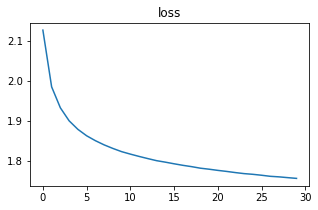

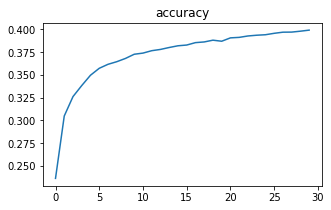

In [10]:
plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['accuracy'])
plt.title('accuracy');

### Inference

For a better measure of the quality of the model, let's see the model accuracy for the test data. 

In [11]:
linscores = linear_model.evaluate(x_test, y_test, verbose=2)
print("%s: %.2f%%" % (linear_model.metrics_names[1], linscores[1]*100))

313/313 - 0s - loss: 1.7720 - accuracy: 0.3874 - 362ms/epoch - 1ms/step
accuracy: 38.74%


We can now take a closer look on the results.

Let's define a helper function to show the failure cases of our classifier. 

In [12]:
def show_failures(predictions, trueclass=None, predictedclass=None, maxtoshow=20):
    rounded = numpy.argmax(predictions, axis=1)
    errors = rounded!=y_test.flatten()
    print('Showing max', maxtoshow, 'first failures. '
          'The predicted class is shown first and the correct class in parenthesis.')
    ii = 0
    plt.figure(figsize=(maxtoshow, 1))
    for i in range(x_test.shape[0]):
        if ii>=maxtoshow:
            break
        if errors[i]:
            if trueclass is not None and y_test[i] != trueclass:
                continue
            if predictedclass is not None and rounded[i] != predictedclass:
                continue
            plt.subplot(1, maxtoshow, ii+1)
            plt.axis('off')
            plt.imshow(x_test[i,:,:], cmap="gray")
            plt.title("%d (%d)" % (rounded[i], y_test[i]))
            ii = ii + 1

Here are the first 20 test images the linear model classified to a wrong class:

313/313 [==============================] - 0s 644us/step
Showing max 20 first failures. The predicted class is shown first and the correct class in parenthesis.


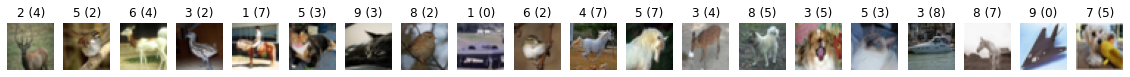

In [13]:
linpredictions = linear_model.predict(x_test)

show_failures(linpredictions)

## Multi-layer perceptron (MLP) network

### Initialization

Let's now create a more complex MLP model that has multiple layers, non-linear activation functions, and dropout layers. 

`Dropout()` randomly sets a fraction of inputs to zero during training, which is one approach to regularization and can sometimes help to prevent overfitting. 

There are two options below, a simple and a bit more complex model.  Select either one.

The output of the last layer needs to be a softmaxed 10-dimensional vector to match the groundtruth (`y_train`). 

In [4]:
class NonlinearClassifier(tf.keras.models.Model):

    def __init__(self, activation=tf.nn.tanh):
        tf.keras.models.Model.__init__(self)

        self.layer_1 = tf.keras.layers.Dense(50, activation='relu')
        
        # A bit more complex model: (need to uncomment in call fn as well)
        self.layer_2 = tf.keras.layers.Dense(50, activation='relu')
        self.drop_3 = tf.keras.layers.Dropout(0.2)
        self.layer_4 = tf.keras.layers.Dense(50, activation='relu')
        self.drop_5 = tf.keras.layers.Dropout(0.2)
        
        # The last layer needs to be like this:
        self.layer_out = tf.keras.layers.Dense(10, activation='softmax')


    def call(self, inputs):

        x = tf.keras.layers.Flatten()(inputs)
        x = self.layer_1(x)
        
        # The more complex version:
        x = self.layer_2(x)
        x = self.drop_3(x)
        x = self.layer_4(x)
        x = self.drop_5(x)
        
        x = self.layer_out(x)

        return x

Finally, we again `compile()` the model, this time using [*SGD*](https://keras.io/optimizers/#rmsprop) as the optimizer.

In [15]:
nonlinear_model = NonlinearClassifier()

nonlinear_model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])

### Learning

In [16]:
%%time
# This took around a third of a second per epoch on my laptop for the simpler version, 
# and around 1 second per epoch for the more complex one.
batch_size = 512
epochs = 30
history = nonlinear_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2)

Epoch 1/30
98/98 - 1s - loss: 2.2931 - accuracy: 0.1303 - 602ms/epoch - 6ms/step
Epoch 2/30
98/98 - 0s - loss: 2.2495 - accuracy: 0.1732 - 201ms/epoch - 2ms/step
Epoch 3/30
98/98 - 0s - loss: 2.2024 - accuracy: 0.1976 - 202ms/epoch - 2ms/step
Epoch 4/30
98/98 - 0s - loss: 2.1485 - accuracy: 0.2119 - 207ms/epoch - 2ms/step
Epoch 5/30
98/98 - 0s - loss: 2.0969 - accuracy: 0.2273 - 200ms/epoch - 2ms/step
Epoch 6/30
98/98 - 0s - loss: 2.0572 - accuracy: 0.2392 - 204ms/epoch - 2ms/step
Epoch 7/30
98/98 - 0s - loss: 2.0291 - accuracy: 0.2487 - 204ms/epoch - 2ms/step
Epoch 8/30
98/98 - 0s - loss: 2.0087 - accuracy: 0.2576 - 205ms/epoch - 2ms/step
Epoch 9/30
98/98 - 0s - loss: 1.9923 - accuracy: 0.2628 - 203ms/epoch - 2ms/step
Epoch 10/30
98/98 - 0s - loss: 1.9749 - accuracy: 0.2731 - 207ms/epoch - 2ms/step
Epoch 11/30
98/98 - 0s - loss: 1.9586 - accuracy: 0.2788 - 213ms/epoch - 2ms/step
Epoch 12/30
98/98 - 0s - loss: 1.9499 - accuracy: 0.2848 - 210ms/epoch - 2ms/step
Epoch 13/30
98/98 - 0s - 

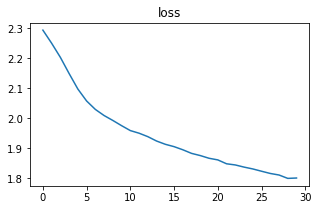

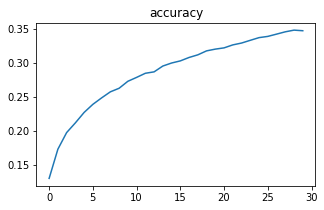

In [17]:
plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['accuracy'])
plt.title('accuracy');

### Inference

Accuracy for test data.  The model should be better than the linear model. 

In [18]:
%%time
scores = nonlinear_model.evaluate(x_test, y_test, verbose=2)
print("%s: %.2f%%" % (nonlinear_model.metrics_names[1], scores[1]*100))

313/313 - 0s - loss: 1.7171 - accuracy: 0.3953 - 395ms/epoch - 1ms/step
accuracy: 39.53%
CPU times: user 637 ms, sys: 138 ms, total: 775 ms
Wall time: 554 ms


We can again take a closer look on the results, using the `show_failures()` function defined earlier.

Here are the first 20 test images the MLP classified to a wrong class:

313/313 [==============================] - 0s 730us/step
Showing max 20 first failures. The predicted class is shown first and the correct class in parenthesis.


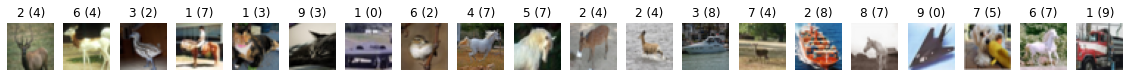

In [19]:
predictions = nonlinear_model.predict(x_test)

show_failures(predictions)

We can use `show_failures()` to inspect failures in more detail. For example, here are failures in which the true class was "6":

Showing max 20 first failures. The predicted class is shown first and the correct class in parenthesis.


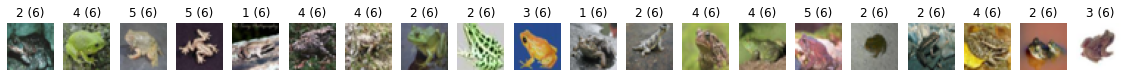

In [20]:
show_failures(predictions, trueclass=6)

We can also compute the confusion matrix to see which image get mixed the most, and look at classification accuracies separately for each class:

In [21]:
from sklearn.metrics import confusion_matrix

print('Confusion matrix (rows: true classes; columns: predicted classes):'); print()
cm=confusion_matrix(y_test, numpy.argmax(predictions, axis=1), labels=list(range(10)))
print(cm); print()

print('Classification accuracy for each class:'); print()
for i,j in enumerate(cm.diagonal()/cm.sum(axis=1)): print("%d: %.4f" % (i,j))

Confusion matrix (rows: true classes; columns: predicted classes):

[[424  37  67  21  16  32  37  79 211  76]
 [ 31 461   6  22  11  42  58  39 124 206]
 [112  18 254  26 139 107 207  83  35  19]
 [ 33  42 104  97  34 302 204  87  32  65]
 [ 59  18 150  23 247  85 234 134  25  25]
 [ 18  22 115  64  63 405 168  79  42  24]
 [  3  22  80  38 111  83 591  30   9  33]
 [ 44  42  85  24  75  79 107 455  22  67]
 [130  90  24  22   1  53  14  28 518 120]
 [ 48 166   9  20   2  21  60  67 106 501]]

Classification accuracy for each class:

0: 0.4240
1: 0.4610
2: 0.2540
3: 0.0970
4: 0.2470
5: 0.4050
6: 0.5910
7: 0.4550
8: 0.5180
9: 0.5010


In the next notebook, we'll introduce convolutional layers, which are commonly used for images.

# In-class exercise: improve the accuracy of this model

How can you improve model accuracy by increasing epochs, stacking more layers, or changing the optimizer?

### Answer: try different epochs and optimizers

After run the codes below, we find that

Best epoch is 100 and best optimizer is adamax. The test accuracy reached to 0.46

In [6]:
epoch_options = [30,50,100]
optimizer_options = ['sgd','adam','adamax']

best_epoch = None
best_optimizer = None
max_test_accuracy = 0

for epo in epoch_options:
    for opt in optimizer_options:
        # compile model
        nonlinear_model = NonlinearClassifier()
        nonlinear_model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=['accuracy'])
        # train
        history = nonlinear_model.fit(x_train, y_train, batch_size = 512, epochs=epo, verbose=2)
        # evaluation
        scores = nonlinear_model.evaluate(x_test, y_test, verbose=2)
        print("for epoch = %d, testing %s: %.2f%%" % (epo, nonlinear_model.metrics_names[1], scores[1]*100))
        cur_test_acc = scores[1]
        if cur_test_acc > max_test_accuracy:
            max_test_accuracy = cur_test_acc
            best_epoch = epo
            best_optimizer = opt

print(f"Best epoch is {best_epoch} and best optimizer is {best_optimizer}. The test accuracy reached to {max_test_accuracy}")

Epoch 1/30
98/98 - 1s - loss: 2.2716 - accuracy: 0.1377 - 1s/epoch - 13ms/step
Epoch 2/30
98/98 - 0s - loss: 2.2039 - accuracy: 0.1801 - 225ms/epoch - 2ms/step
Epoch 3/30
98/98 - 0s - loss: 2.1497 - accuracy: 0.2043 - 222ms/epoch - 2ms/step
Epoch 4/30
98/98 - 0s - loss: 2.1097 - accuracy: 0.2179 - 230ms/epoch - 2ms/step
Epoch 5/30
98/98 - 0s - loss: 2.0757 - accuracy: 0.2291 - 220ms/epoch - 2ms/step
Epoch 6/30
98/98 - 0s - loss: 2.0482 - accuracy: 0.2387 - 281ms/epoch - 3ms/step
Epoch 7/30
98/98 - 0s - loss: 2.0280 - accuracy: 0.2456 - 330ms/epoch - 3ms/step
Epoch 8/30
98/98 - 0s - loss: 2.0090 - accuracy: 0.2551 - 214ms/epoch - 2ms/step
Epoch 9/30
98/98 - 0s - loss: 1.9923 - accuracy: 0.2606 - 205ms/epoch - 2ms/step
Epoch 10/30
98/98 - 0s - loss: 1.9789 - accuracy: 0.2677 - 203ms/epoch - 2ms/step
Epoch 11/30
98/98 - 0s - loss: 1.9649 - accuracy: 0.2764 - 210ms/epoch - 2ms/step
Epoch 12/30
98/98 - 0s - loss: 1.9551 - accuracy: 0.2800 - 205ms/epoch - 2ms/step
Epoch 13/30
98/98 - 0s - lo

Epoch 8/50
98/98 - 0s - loss: 1.9990 - accuracy: 0.2600 - 217ms/epoch - 2ms/step
Epoch 9/50
98/98 - 0s - loss: 1.9799 - accuracy: 0.2708 - 213ms/epoch - 2ms/step
Epoch 10/50
98/98 - 0s - loss: 1.9674 - accuracy: 0.2780 - 213ms/epoch - 2ms/step
Epoch 11/50
98/98 - 0s - loss: 1.9512 - accuracy: 0.2870 - 210ms/epoch - 2ms/step
Epoch 12/50
98/98 - 0s - loss: 1.9386 - accuracy: 0.2919 - 236ms/epoch - 2ms/step
Epoch 13/50
98/98 - 0s - loss: 1.9278 - accuracy: 0.2949 - 211ms/epoch - 2ms/step
Epoch 14/50
98/98 - 0s - loss: 1.9136 - accuracy: 0.3056 - 216ms/epoch - 2ms/step
Epoch 15/50
98/98 - 0s - loss: 1.9024 - accuracy: 0.3078 - 218ms/epoch - 2ms/step
Epoch 16/50
98/98 - 0s - loss: 1.8964 - accuracy: 0.3112 - 210ms/epoch - 2ms/step
Epoch 17/50
98/98 - 0s - loss: 1.8873 - accuracy: 0.3147 - 214ms/epoch - 2ms/step
Epoch 18/50
98/98 - 0s - loss: 1.8760 - accuracy: 0.3188 - 214ms/epoch - 2ms/step
Epoch 19/50
98/98 - 0s - loss: 1.8690 - accuracy: 0.3227 - 221ms/epoch - 2ms/step
Epoch 20/50
98/98 

Epoch 6/50
98/98 - 0s - loss: 1.8589 - accuracy: 0.3264 - 223ms/epoch - 2ms/step
Epoch 7/50
98/98 - 0s - loss: 1.8375 - accuracy: 0.3359 - 225ms/epoch - 2ms/step
Epoch 8/50
98/98 - 0s - loss: 1.8146 - accuracy: 0.3436 - 225ms/epoch - 2ms/step
Epoch 9/50
98/98 - 0s - loss: 1.8034 - accuracy: 0.3499 - 225ms/epoch - 2ms/step
Epoch 10/50
98/98 - 0s - loss: 1.7861 - accuracy: 0.3591 - 228ms/epoch - 2ms/step
Epoch 11/50
98/98 - 0s - loss: 1.7741 - accuracy: 0.3636 - 210ms/epoch - 2ms/step
Epoch 12/50
98/98 - 0s - loss: 1.7616 - accuracy: 0.3655 - 212ms/epoch - 2ms/step
Epoch 13/50
98/98 - 0s - loss: 1.7533 - accuracy: 0.3723 - 215ms/epoch - 2ms/step
Epoch 14/50
98/98 - 0s - loss: 1.7427 - accuracy: 0.3773 - 222ms/epoch - 2ms/step
Epoch 15/50
98/98 - 0s - loss: 1.7386 - accuracy: 0.3799 - 226ms/epoch - 2ms/step
Epoch 16/50
98/98 - 0s - loss: 1.7303 - accuracy: 0.3845 - 233ms/epoch - 2ms/step
Epoch 17/50
98/98 - 0s - loss: 1.7252 - accuracy: 0.3838 - 225ms/epoch - 2ms/step
Epoch 18/50
98/98 - 

98/98 - 0s - loss: 1.7243 - accuracy: 0.3774 - 221ms/epoch - 2ms/step
Epoch 55/100
98/98 - 0s - loss: 1.7210 - accuracy: 0.3787 - 220ms/epoch - 2ms/step
Epoch 56/100
98/98 - 0s - loss: 1.7150 - accuracy: 0.3803 - 218ms/epoch - 2ms/step
Epoch 57/100
98/98 - 0s - loss: 1.7171 - accuracy: 0.3812 - 217ms/epoch - 2ms/step
Epoch 58/100
98/98 - 0s - loss: 1.7105 - accuracy: 0.3806 - 216ms/epoch - 2ms/step
Epoch 59/100
98/98 - 0s - loss: 1.7062 - accuracy: 0.3856 - 203ms/epoch - 2ms/step
Epoch 60/100
98/98 - 0s - loss: 1.7025 - accuracy: 0.3844 - 208ms/epoch - 2ms/step
Epoch 61/100
98/98 - 0s - loss: 1.6977 - accuracy: 0.3867 - 218ms/epoch - 2ms/step
Epoch 62/100
98/98 - 0s - loss: 1.6973 - accuracy: 0.3864 - 219ms/epoch - 2ms/step
Epoch 63/100
98/98 - 0s - loss: 1.6962 - accuracy: 0.3893 - 216ms/epoch - 2ms/step
Epoch 64/100
98/98 - 0s - loss: 1.6887 - accuracy: 0.3901 - 219ms/epoch - 2ms/step
Epoch 65/100
98/98 - 0s - loss: 1.6914 - accuracy: 0.3910 - 218ms/epoch - 2ms/step
Epoch 66/100
98/9

Epoch 52/100
98/98 - 0s - loss: 1.5833 - accuracy: 0.4344 - 216ms/epoch - 2ms/step
Epoch 53/100
98/98 - 0s - loss: 1.5779 - accuracy: 0.4373 - 216ms/epoch - 2ms/step
Epoch 54/100
98/98 - 0s - loss: 1.5846 - accuracy: 0.4351 - 221ms/epoch - 2ms/step
Epoch 55/100
98/98 - 0s - loss: 1.5834 - accuracy: 0.4334 - 217ms/epoch - 2ms/step
Epoch 56/100
98/98 - 0s - loss: 1.5788 - accuracy: 0.4357 - 219ms/epoch - 2ms/step
Epoch 57/100
98/98 - 0s - loss: 1.5803 - accuracy: 0.4364 - 219ms/epoch - 2ms/step
Epoch 58/100
98/98 - 0s - loss: 1.5789 - accuracy: 0.4385 - 215ms/epoch - 2ms/step
Epoch 59/100
98/98 - 0s - loss: 1.5760 - accuracy: 0.4375 - 215ms/epoch - 2ms/step
Epoch 60/100
98/98 - 0s - loss: 1.5793 - accuracy: 0.4350 - 209ms/epoch - 2ms/step
Epoch 61/100
98/98 - 0s - loss: 1.5777 - accuracy: 0.4391 - 211ms/epoch - 2ms/step
Epoch 62/100
98/98 - 0s - loss: 1.5710 - accuracy: 0.4383 - 215ms/epoch - 2ms/step
Epoch 63/100
98/98 - 0s - loss: 1.5691 - accuracy: 0.4387 - 210ms/epoch - 2ms/step
Epoc

Epoch 50/100
98/98 - 0s - loss: 1.5554 - accuracy: 0.4444 - 211ms/epoch - 2ms/step
Epoch 51/100
98/98 - 0s - loss: 1.5588 - accuracy: 0.4423 - 214ms/epoch - 2ms/step
Epoch 52/100
98/98 - 0s - loss: 1.5580 - accuracy: 0.4439 - 218ms/epoch - 2ms/step
Epoch 53/100
98/98 - 0s - loss: 1.5460 - accuracy: 0.4473 - 209ms/epoch - 2ms/step
Epoch 54/100
98/98 - 0s - loss: 1.5472 - accuracy: 0.4480 - 215ms/epoch - 2ms/step
Epoch 55/100
98/98 - 0s - loss: 1.5459 - accuracy: 0.4479 - 218ms/epoch - 2ms/step
Epoch 56/100
98/98 - 0s - loss: 1.5401 - accuracy: 0.4504 - 214ms/epoch - 2ms/step
Epoch 57/100
98/98 - 0s - loss: 1.5465 - accuracy: 0.4480 - 218ms/epoch - 2ms/step
Epoch 58/100
98/98 - 0s - loss: 1.5360 - accuracy: 0.4501 - 214ms/epoch - 2ms/step
Epoch 59/100
98/98 - 0s - loss: 1.5402 - accuracy: 0.4485 - 232ms/epoch - 2ms/step
Epoch 60/100
98/98 - 0s - loss: 1.5407 - accuracy: 0.4492 - 221ms/epoch - 2ms/step
Epoch 61/100
98/98 - 0s - loss: 1.5276 - accuracy: 0.4527 - 213ms/epoch - 2ms/step
Epoc

# 02_keras_cnn part

## Convolutional neural network (CNN)

CNN is a type of deep learning model for processing data that has a grid pattern, such as images.

Let's use a small model that includes convolutional layers

- The Conv2D layers operate on 2D matrices so we input the images directly to the model.
    - The two Conv2D layers below learn 32 and 64 filters respectively. 
    - They are learning filters for 3x3 windows.
- The MaxPooling2D layer reduces the spatial dimensions, that is, makes the image smaller.
    - It downsamples by taking the maximum value in the window 
    - The pool size of (2, 2) below means the windows are 2x2. 
    - Helps in extracting important features and reduce computation
- The Flatten layer flattens the 2D matrices into vectors, so we can then switch to Dense layers as in the MLP model.

In [7]:
class CIFAR10Classifier(tf.keras.models.Model):

    def __init__(self, activation=tf.nn.tanh):
        tf.keras.models.Model.__init__(self)

        self.conv_1 = tf.keras.layers.Conv2D(32, [3, 3], activation='relu')
        self.conv_2 = tf.keras.layers.Conv2D(64, [3, 3], activation='relu')
        self.pool_3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
        self.drop_4 = tf.keras.layers.Dropout(0.25)
        self.dense_5 = tf.keras.layers.Dense(128, activation='relu')
        self.drop_6 = tf.keras.layers.Dropout(0.5)
        self.dense_7 = tf.keras.layers.Dense(10, activation='softmax')

    def call(self, inputs):

        x = self.conv_1(inputs)
        x = self.conv_2(x)
        x = self.pool_3(x)
        x = self.drop_4(x)
        x = tf.keras.layers.Flatten()(x)
        x = self.dense_5(x)
        x = self.drop_6(x)
        x = self.dense_7(x)

        return x

In [8]:
# simple training
def train_network_concise(_batch_size, _n_training_epochs, _lr):

    cnn_model = CIFAR10Classifier()

    cnn_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
    
    history = cnn_model.fit(x_train, y_train, batch_size=_batch_size, epochs=_n_training_epochs)
    return history, cnn_model

In [10]:
# This took 43 seconds per epoch on my laptop
batch_size = 512
epochs = 3
lr = .01
history, cnn_model = train_network_concise(batch_size, epochs, lr)

Epoch 1/3
98/98 [==============================] - 1s 7ms/step - loss: 1.8356 - accuracy: 0.3299
Epoch 2/3
98/98 [==============================] - 1s 7ms/step - loss: 1.4476 - accuracy: 0.4807
Epoch 3/3
98/98 [==============================] - 1s 7ms/step - loss: 1.2886 - accuracy: 0.5425


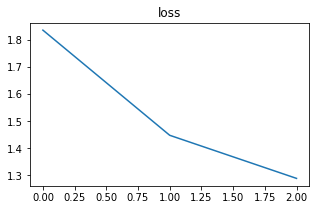

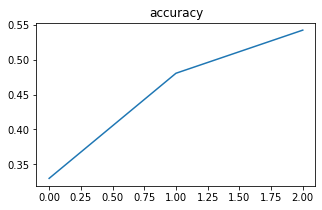

In [11]:
# plot losses
plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['accuracy'])
plt.title('accuracy');

In [12]:
%%time
x_test_reshaped = numpy.expand_dims(x_test, -1)
scores = cnn_model.evaluate(x_test, y_test, verbose=2)
print("%s: %.2f%%" % (cnn_model.metrics_names[1], scores[1]*100))

313/313 - 1s - loss: 1.1436 - accuracy: 0.6089 - 501ms/epoch - 2ms/step
accuracy: 60.89%
CPU times: user 765 ms, sys: 100 ms, total: 865 ms
Wall time: 616 ms


In [13]:
from sklearn.metrics import confusion_matrix

print('Confusion matrix (rows: true classes; columns: predicted classes):'); print()
predictions = cnn_model.predict(x_test)
cm=confusion_matrix(y_test, numpy.argmax(predictions, axis=1), labels=list(range(10)))
print(cm); print()

print('Classification accuracy for each class:'); print()
for i,j in enumerate(cm.diagonal()/cm.sum(axis=1)): print("%d: %.4f" % (i,j))

Confusion matrix (rows: true classes; columns: predicted classes):

313/313 [==============================] - 0s 882us/step
[[650  19  86  19   7   4  16   3 172  24]
 [ 28 774  14  10   2   4   9   4 108  47]
 [ 83  19 548  61  70  83  79  21  28   8]
 [ 22  18 112 463  56 173  89  17  37  13]
 [ 47   9 195  78 442  40 104  55  28   2]
 [ 20   7 108 214  31 514  34  45  24   3]
 [  7  16  78  91  40  15 729   7  13   4]
 [ 23   8  64  61  72 102  17 613  16  24]
 [ 85  52  14  14   3   4   3   4 807  14]
 [ 44 216  13  19   5   9  17  13 115 549]]

Classification accuracy for each class:

0: 0.6500
1: 0.7740
2: 0.5480
3: 0.4630
4: 0.4420
5: 0.5140
6: 0.7290
7: 0.6130
8: 0.8070
9: 0.5490


# Homework: improve the accuracy of this model
Update this notebook to ensure more accuracy. How high can it be raised? Changes like increasing the number of epochs, altering the learning rate, altering the number of neurons the hidden layer, chnaging the optimizer, etc. could be made directly in the notebook. You can also change the model specification by expanding the network's layer. The current notebook's training accuracy is roughly 58.06%, although it varies randomly.

Answer: try a more complex cnn with 4 more layers
The testing accuracy increased to 76.47%

In [19]:
class CIFAR10Classifier(tf.keras.models.Model):

    def __init__(self, activation=tf.nn.tanh):
        tf.keras.models.Model.__init__(self)

        self.conv_1 = tf.keras.layers.Conv2D(32, [3, 3], activation='relu', kernel_initializer='he_uniform', padding='same')
        self.conv_2 = tf.keras.layers.Conv2D(32, [3, 3], activation='relu', kernel_initializer='he_uniform', padding='same')
        self.pool_3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
        self.drop_4 = tf.keras.layers.Dropout(0.2)
        self.conv_5 = tf.keras.layers.Conv2D(64, [3, 3], activation='relu', kernel_initializer='he_uniform', padding='same')
        self.conv_6 = tf.keras.layers.Conv2D(64, [3, 3], activation='relu', kernel_initializer='he_uniform', padding='same')
        self.pool_7 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
        self.drop_8 = tf.keras.layers.Dropout(0.2)
        self.dense_9 = tf.keras.layers.Dense(128, activation='relu')
        self.drop_10 = tf.keras.layers.Dropout(0.2)
        self.dense_11 = tf.keras.layers.Dense(10, activation='softmax')
        

    def call(self, inputs):

        x = self.conv_1(inputs)
        x = self.conv_2(x)
        x = self.pool_3(x)
        x = self.drop_4(x)
        
        x = self.conv_5(x)
        x = self.conv_6(x)
        x = self.pool_7(x)
        x = self.drop_8(x)
        
        x = tf.keras.layers.Flatten()(x)
        x = self.dense_9(x)
        x = self.drop_10(x)
        x = self.dense_11(x)

        return x

In [20]:
def train_network_concise(_batch_size, _n_training_epochs, _lr):

    cnn_model = CIFAR10Classifier()

    cnn_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
    
    history = cnn_model.fit(x_train, y_train, batch_size=_batch_size, epochs=_n_training_epochs)
    return history, cnn_model

In [21]:
batch_size = 64
epochs = 10
lr = .01
history, cnn_model = train_network_concise(batch_size, epochs, lr)

Epoch 1/10
782/782 [==============================] - 3s 3ms/step - loss: 1.6090 - accuracy: 0.4218
Epoch 2/10
782/782 [==============================] - 2s 3ms/step - loss: 1.1269 - accuracy: 0.5970
Epoch 3/10
782/782 [==============================] - 2s 3ms/step - loss: 0.9513 - accuracy: 0.6660
Epoch 4/10
782/782 [==============================] - 2s 3ms/step - loss: 0.8528 - accuracy: 0.6993
Epoch 5/10
782/782 [==============================] - 2s 3ms/step - loss: 0.7702 - accuracy: 0.7307
Epoch 6/10
782/782 [==============================] - 2s 3ms/step - loss: 0.7128 - accuracy: 0.7501
Epoch 7/10
782/782 [==============================] - 2s 3ms/step - loss: 0.6627 - accuracy: 0.7659
Epoch 8/10
782/782 [==============================] - 2s 3ms/step - loss: 0.6206 - accuracy: 0.7815
Epoch 9/10
782/782 [==============================] - 2s 3ms/step - loss: 0.5921 - accuracy: 0.7907
Epoch 10/10
782/782 [==============================] - 2s 3ms/step - loss: 0.5508 - accuracy: 0.8040

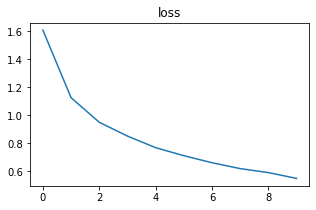

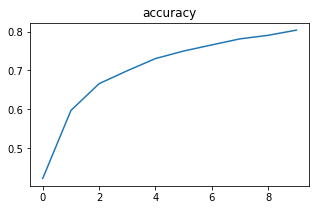

In [22]:
plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['accuracy'])
plt.title('accuracy');

In [23]:
%%time
x_test_reshaped = numpy.expand_dims(x_test, -1)
scores = cnn_model.evaluate(x_test, y_test, verbose=2)
print("%s: %.2f%%" % (cnn_model.metrics_names[1], scores[1]*100))

313/313 - 1s - loss: 0.7092 - accuracy: 0.7647 - 507ms/epoch - 2ms/step
accuracy: 76.47%
CPU times: user 786 ms, sys: 91.1 ms, total: 878 ms
Wall time: 635 ms
